In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests
import gzip
import io
import seaborn as sns
import numpy as np
from collections import Counter
from networkx.algorithms.community import greedy_modularity_communities

In [33]:
# Download the Dataset
url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
response = requests.get(url)

In [34]:
# Unzip the Dataset
with gzip.open(io.BytesIO(response.content), 'rt') as f:
    edges = pd.read_csv(f, sep=' ', names=['user1', 'user2'])


In [35]:
# Create a Graph from the Data
G = nx.from_pandas_edgelist(edges, 'user1', 'user2')

In [36]:
# Data Exploration: Print basic info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 4039
Number of edges: 88234


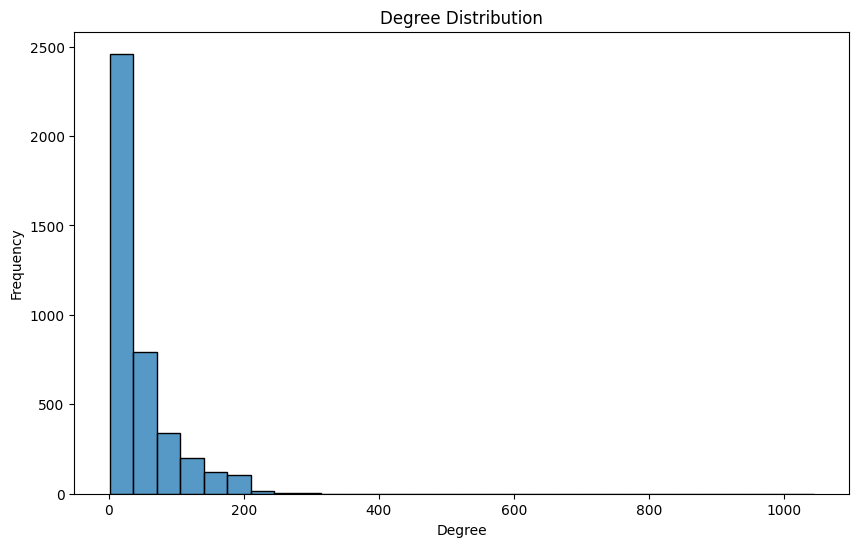

In [37]:
# Visualize Degree Distribution
degree_sequence = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10,6))
sns.histplot(degree_sequence, kde=False, bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [38]:
# Calculate Average Degree
avg_degree = np.mean(degree_sequence)
print(f"Average number of connections per user: {avg_degree}")


Average number of connections per user: 43.69101262688784


In [39]:
# Graph Construction and Basic Properties
network_density = nx.density(G)
print(f"Network Density: {network_density}")


Network Density: 0.010819963503439287


In [40]:
# Finding diameter (can take time for large networks)
try:
    diameter = nx.diameter(G)
except nx.exception.NetworkXError:
    diameter = 'Graph is disconnected'
print(f"Network Diameter: {diameter}")


Network Diameter: 8


In [41]:
# Average shortest path length
avg_path_length = nx.average_shortest_path_length(G)
print(f"Average Path Length: {avg_path_length}")


Average Path Length: 3.6925068496963913


In [42]:
#Identify Key Influencers with Centrality Measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
pagerank_centrality = nx.pagerank(G)

In [43]:
 # Find top 10 influencers by various centralities
top_influencers_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_influencers_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_influencers_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_influencers_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 influencers by degree centrality:", top_influencers_degree)
print("Top 10 influencers by closeness centrality:", top_influencers_closeness)
print("Top 10 influencers by betweenness centrality:", top_influencers_betweenness)
print("Top 10 influencers by PageRank:", top_influencers_pagerank)


Top 10 influencers by degree centrality: [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354), (2543, 0.07280832095096582), (2347, 0.07206537890044576), (1888, 0.0629024269440317), (1800, 0.06067360079247152), (1663, 0.058197127290737984)]
Top 10 influencers by closeness centrality: [(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796), (171, 0.37049270575282134), (348, 0.36991572004397216), (483, 0.3698479575013739), (414, 0.3695433330282786), (376, 0.36655773420479304)]
Top 10 influencers by betweenness centrality: [(107, 0.4805180785560152), (1684, 0.3377974497301992), (3437, 0.23611535735892905), (1912, 0.2292953395868782), (1085, 0.14901509211665306), (0, 0.14630592147442917), (698, 0.11533045020560802), (567, 0.09631033121856215), (58, 0.08436020590796486), (428, 0.06430906239323866)]
Top 10 influencers by PageRank

In [44]:
#  Community Detection (Using Louvain method for community detection)
communities = list(greedy_modularity_communities(G))
print(f"Number of communities detected: {len(communities)}")


Number of communities detected: 13


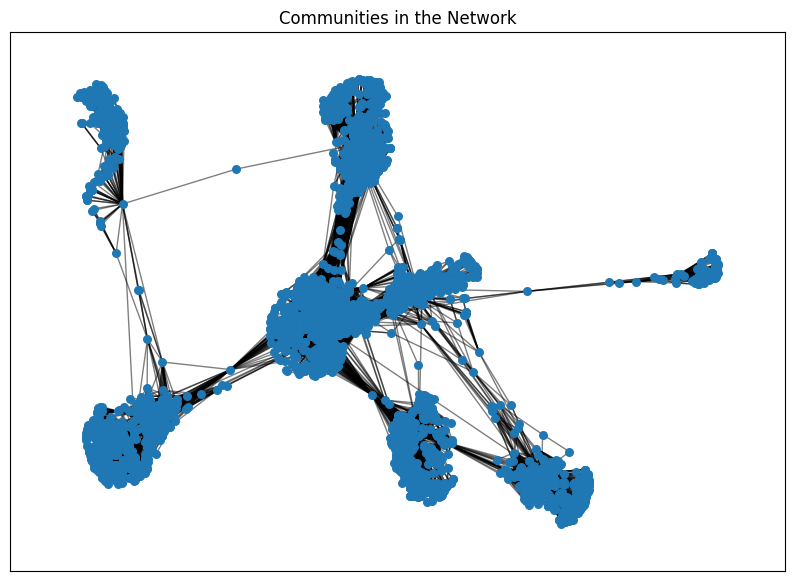

In [45]:
# Visualize the communities
plt.figure(figsize=(10,7))
pos = nx.spring_layout(G)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_size=30, label=f'Community {i+1}')
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities in the Network")
plt.show()


In [46]:
# Simple Recommendation System (Based on common neighbors)
def recommend_connections(G, user, top_n=5):
    # Get friends of friends not already connected
    possible_recommendations = Counter()
    for neighbor in G.neighbors(user):
        for friend_of_friend in G.neighbors(neighbor):
            if friend_of_friend != user and not G.has_edge(user, friend_of_friend):
                possible_recommendations[friend_of_friend] += 1
    # Return top N recommendations
    return possible_recommendations.most_common(top_n)

# Example: Get recommendations for a specific user
user_id = 0  # Replace with any valid user ID
recommendations = recommend_connections(G, user_id)
print(f"Top recommendations for user {user_id}: {recommendations}")

Top recommendations for user 0: [(348, 4), (414, 3), (1684, 3), (428, 2), (1912, 2)]


In [49]:
# Interactive Visualization with Plotly

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import requests
import gzip
import io
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def plot_graph(G):
    pos = nx.spring_layout(G)
    edges_x = []
    edges_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edges_x.append(x0)
        edges_x.append(x1)
        edges_y.append(y0)
        edges_y.append(y1)

    edge_trace = go.Scatter(
        x=edges_x, y=edges_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=10,
            color=[],
            colorbar=dict(thickness=15, title='Node Degree', xanchor='left', titleside='right'),
            line_width=2))

    node_adjacencies = []
    node_text = []
    for i, node in enumerate(G.nodes()):
        node_adjacencies.append(G.degree(node))
        node_text.append(f'Node {node}: {G.degree(node)} connections')

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                     layout=go.Layout(
                        title='<br>Network Graph of Facebook Social Network',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0,l=0,r=0,t=40),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    return fig

# Plot the interactive graph
fig = plot_graph(G)
fig.show()

Business Insights and Interpretation
1. Leveraging Key Influencers
Actionable Insight: The users identified as key influencers based on centrality measures (degree, closeness, betweenness, and PageRank) should be targeted for marketing campaigns. Collaborating with these individuals can enhance the reach and effectiveness of promotions, as they have the highest connectivity and influence within the network.
Recommendation: Develop partnerships or ambassador programs with these influencers to promote new features, products, or campaigns, leveraging their extensive reach to drive engagement.


2. Community Engagement Strategies
Actionable Insight: The community detection analysis revealed distinct groups within the network. Each community may have different interests, behaviors, and demographics.
Recommendation: Tailor marketing strategies for each community. For example, if one community is predominantly young users interested in tech, targeted promotions for tech products or features should be emphasized. Create community-specific content to foster deeper connections.


3. Optimizing User Recommendations
Actionable Insight: The recommendation system identified potential new connections for users based on shared neighbors. Encouraging users to connect with these recommended profiles can enhance user engagement and retention.
Recommendation: Implement a feature in the app that suggests connections to users based on their current friends and shared interests, facilitating a more engaging user experience.


4. Promoting User Retention
Actionable Insight: Understanding community structures can inform retention strategies. Engaged communities are more likely to keep users active within the platform.
Recommendation: Organize community events or online forums to keep users engaged. Create features that encourage interaction within communities, such as group challenges or shared content areas.


5. Targeted Advertising
Actionable Insight: Communities can be valuable for targeted advertising strategies. Ads can be customized based on the preferences and demographics of specific community groups.
Recommendation: Utilize insights from community analysis to develop targeted ad campaigns. For instance, if a community shows high engagement with health-related content, promote health products or services to that community.


6. Understanding User Behavior
Actionable Insight: Analyzing the behaviors of key influencers and their communities can provide deeper insights into user motivations and engagement patterns.
Recommendation: Conduct surveys or feedback sessions within these communities to gather qualitative data. This can help refine marketing strategies and product features to align better with user needs.


7. Performance Tracking and Adjustment
Actionable Insight: Implementing these strategies requires monitoring their effectiveness and adapting as needed.
Recommendation: Establish KPIs (Key Performance Indicators) for engagement, conversion rates, and user growth to evaluate the impact of these strategies. Use A/B testing to refine approaches based on real user data.


Conclusion
By leveraging the insights gained from centrality measures and community structures, the business can create more effective marketing strategies, improve user engagement, and drive retention. Implementing tailored approaches based on user interactions will ultimately enhance the overall experience on the platform.

